In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from nltk.stem.porter import PorterStemmer
import re
import string
import nltk
import contractions
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import emoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

ModuleNotFoundError: No module named 'contractions'

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 9.4 MB/s eta 0:00:00


In [ ]:

!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 16.1 MB/s eta 0:00:00


In [ ]:
df=pd.read_csv(f'/content/Reviews.csv')

NameError: name 'pd' is not defined

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


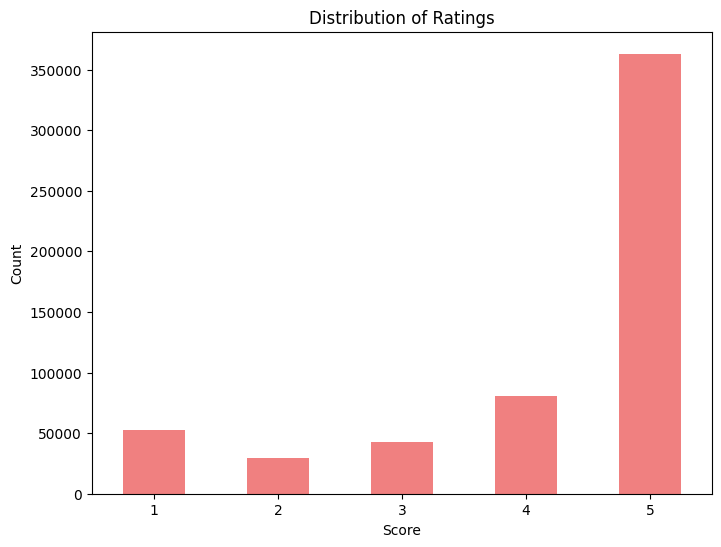

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
df['Score'].value_counts().sort_index().plot(kind='bar', color='lightcoral')
plt.title('Distribution of Ratings')
plt.xlabel('Score')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

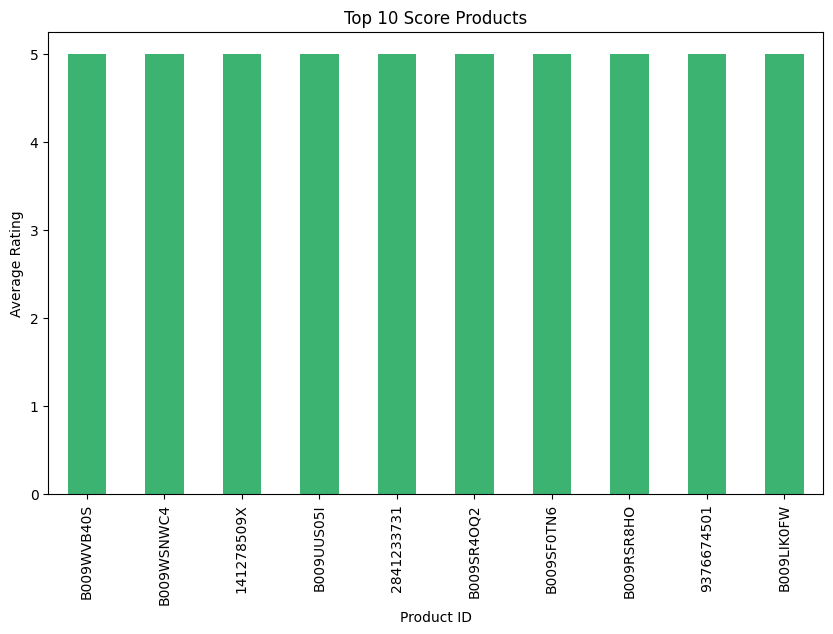

In [ ]:
top_rated = df.groupby('ProductId')['Score'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_rated.plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Score Products')
plt.xlabel('Product ID')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

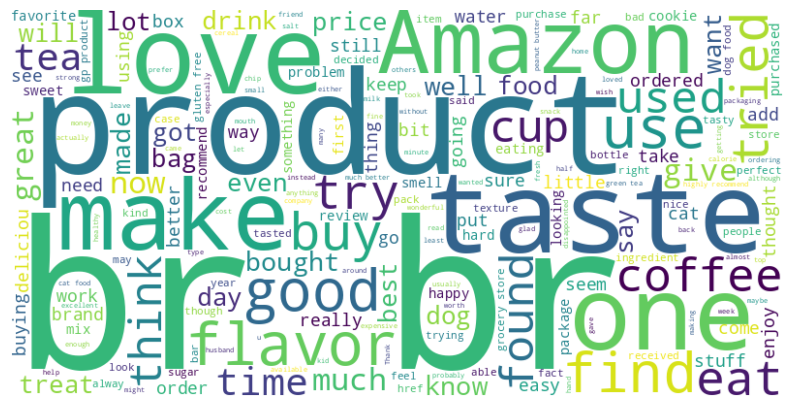

In [ ]:
from wordcloud import WordCloud

text = ' '.join(df['Text'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

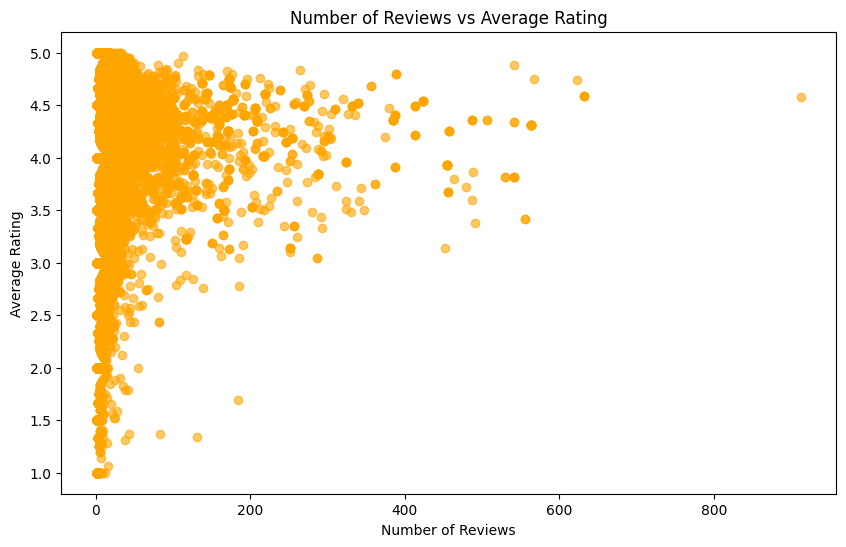

In [ ]:
review_counts = df.groupby('ProductId').size()
average_ratings = df.groupby('ProductId')['Score'].mean()
plt.figure(figsize=(10,6))
plt.scatter(review_counts, average_ratings, color='orange', alpha=0.6)
plt.title('Number of Reviews vs Average Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Rating')
plt.show()

In [ ]:
df=df[['Text', 'Score']]

In [ ]:
df.isnull().sum()

,0
Text,0
Score,0


In [ ]:
df.duplicated().sum()


np.int64(174779)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
def classify_score(score):
    if score >= 4:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['Score'].apply(classify_score)
df.drop('Score', axis=1, inplace=True)

In [ ]:
df=df[df['sentiment']!='Neutral']

<Axes: xlabel='sentiment'>

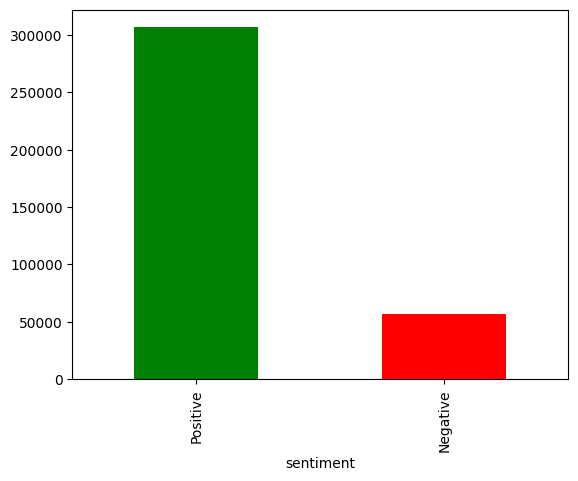

In [ ]:
df['sentiment'].value_counts().plot(kind='bar',color=['green','red'])

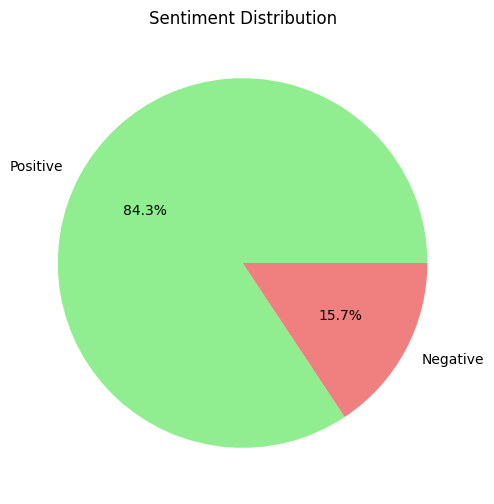

In [ ]:
plt.figure(figsize=(8,6))
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightblue'])
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()

In [ ]:
from tabulate import tabulate

BLUE = "\033[94m"
RESET = "\033[0m"

def print_box(title, content=None, color=BLUE):
    width = 100
    line = "═" * (width - 2)
    print(f"{color}╔{line}╗")
    print(f"║ {title.center(width - 4)} ║")
    print(f"╚{line}╝{RESET}")
    if content is not None:
        print(f"{color}{content}{RESET}\n")

def print_colored_table(df, num_rows=5, color=BLUE):
    table = tabulate(df.head(num_rows), headers='keys', tablefmt='fancy_grid', showindex=False)
    print(color + table + RESET)


In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import re, string, emoji, contractions

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text_combined(text, row_index=None):

    if row_index == 0:
        title = f"Cleaning Row [{row_index}]"
        print_box(title, text)

        text = str(text)
        text = text.lower()
        print_box("Lowercased Text", text)

        text = contractions.fix(text)
        print_box(" After Expanding Contractions", text)

        text = emoji.replace_emoji(text, replace='')
        print_box(" After Removing Emojis", text)

        text = re.sub(r"http\S+|www\S+", '', text)
        print_box(" After Removing URLs", text)

        text = re.sub(r'\S+@\S+', '', text)
        print_box(" After Removing Emails", text)

        text = re.sub(r'\d+', '', text)
        print_box(" After Removing Digits", text)

        text = text.translate(str.maketrans('', '', string.punctuation))
        print_box(" After Removing Punctuation", text)

        tokens = text.split()
        print_box(" Tokenized Text", str(tokens))

        tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
        print_box(" After Removing Stop Words and Short Words", str(tokens))

        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        print_box(" After Lemmatization", str(tokens))

        cleaned = ' '.join(tokens)
        print_box("Final Cleaned Text", cleaned)


    else:
        text = str(text)
        text = text.lower()
        text = contractions.fix(text)
        text = emoji.replace_emoji(text, replace='')
        text = re.sub(r"http\S+|www\S+", '', text)
        text = re.sub(r'\S+@\S+', '', text)
        text = re.sub(r'\d+', '', text)
        text = text.translate(str.maketrans('', '', string.punctuation))

        tokens = text.split()
        tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

        cleaned = ' '.join(tokens)

    return cleaned

clean_text_combined(df.loc[0, 'Text'], row_index=0)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


╔══════════════════════════════════════════════════════════════════════════════════════════════════╗
║                                         Cleaning Row [0]                                         ║
╚══════════════════════════════════════════════════════════════════════════════════════════════════╝
I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.

╔══════════════════════════════════════════════════════════════════════════════════════════════════╗
║                                         Lowercased Text                                          ║
╚══════════════════════════════════════════════════════════════════════════════════════════════════╝
i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks m

'bought several vitality canned dog food product found good quality product look like stew processed meat smell better labrador finicky appreciates product better'

In [ ]:
df['cleaned_text'] = df['Text'].apply(lambda x: clean_text_combined(x, row_index=None))


In [ ]:
print_colored_table(df.head())

╒═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═════════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Text                                                                                                                                                                                           

In [ ]:
print_box("null:",df.isnull().sum())

╔══════════════════════════════════════════════════════════════════════════════════════════════════╗
║                                              null:                                               ║
╚══════════════════════════════════════════════════════════════════════════════════════════════════╝
Text            0
sentiment       0
cleaned_text    0
dtype: int64



In [ ]:
from sklearn.model_selection import train_test_split
X = df['cleaned_text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
x_train_vec = vectorizer.fit_transform(X_train)
x_test_vec = vectorizer.transform(X_test)

In [ ]:
print_box("y_train value count",y_train.value_counts())

╔══════════════════════════════════════════════════════════════════════════════════════════════════╗
║                                       y_train value count                                        ║
╚══════════════════════════════════════════════════════════════════════════════════════════════════╝
sentiment
Positive    245455
Negative     45667
Name: count, dtype: int64



In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
x_train_sm, y_train_sm = smote.fit_resample(x_train_vec, y_train)
print_box("y_train_sm value count",y_train_sm.value_counts())

╔══════════════════════════════════════════════════════════════════════════════════════════════════╗
║                                      y_train_sm value count                                      ║
╚══════════════════════════════════════════════════════════════════════════════════════════════════╝
sentiment
Positive    245455
Negative    245455
Name: count, dtype: int64



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
model = LogisticRegression()
model.fit(x_train_vec, y_train)
y_pred = model.predict(x_test_vec)
print_box("classification report",classification_report(y_test, y_pred))
print_box("Accuracy:", accuracy_score(y_test, y_pred))

╔══════════════════════════════════════════════════════════════════════════════════════════════════╗
║                                      classification report                                       ║
╚══════════════════════════════════════════════════════════════════════════════════════════════════╝
              precision    recall  f1-score   support

    Negative       0.83      0.66      0.73     11417
    Positive       0.94      0.98      0.96     61364

    accuracy                           0.93     72781
   macro avg       0.89      0.82      0.85     72781
weighted avg       0.92      0.93      0.92     72781


╔══════════════════════════════════════════════════════════════════════════════════════════════════╗
║                                            Accuracy:                                             ║
╚══════════════════════════════════════════════════════════════════════════════════════════════════╝
0.9256948928978717



In [ ]:
model = LogisticRegression()
model.fit(x_train_vec, y_train)
y_pred = model.predict(x_test_vec)
print_box("classification report",classification_report(y_test, y_pred))
print_box("Accuracy:", accuracy_score(y_test, y_pred))

╔══════════════════════════════════════════════════════════════════════════════════════════════════╗
║                                      classification report                                       ║
╚══════════════════════════════════════════════════════════════════════════════════════════════════╝
              precision    recall  f1-score   support

    Negative       0.61      0.87      0.72     11417
    Positive       0.97      0.90      0.93     61364

    accuracy                           0.89     72781
   macro avg       0.79      0.88      0.83     72781
weighted avg       0.92      0.89      0.90     72781


╔══════════════════════════════════════════════════════════════════════════════════════════════════╗
║                                            Accuracy:                                             ║
╚══════════════════════════════════════════════════════════════════════════════════════════════════╝
0.8936123438809579



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
model = RandomForestClassifier()
model.fit(x_train_vec, y_train)
y_pred = model.predict(x_test_vec)
print_box("classification report",classification_report(y_test, y_pred))
print_box("Accuracy:", accuracy_score(y_test, y_pred))

╔══════════════════════════════════════════════════════════════════════════════════════════════════╗
║                                      classification report                                       ║
╚══════════════════════════════════════════════════════════════════════════════════════════════════╝
              precision    recall  f1-score   support

    Negative       0.89      0.39      0.54     11417
    Positive       0.90      0.99      0.94     61364

    accuracy                           0.90     72781
   macro avg       0.89      0.69      0.74     72781
weighted avg       0.90      0.90      0.88     72781


╔══════════════════════════════════════════════════════════════════════════════════════════════════╗
║                                            Accuracy:                                             ║
╚══════════════════════════════════════════════════════════════════════════════════════════════════╝
0.8964564927659692



In [ ]:
print(x_train_vec.shape)

(291122, 5000)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,Conv1D,MaxPooling1D,Dropout
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=500)
X_test_pad = pad_sequences(X_test_seq, maxlen=500)


model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=128, input_shape=(500,)))
model.add(Conv1D(filters=128, kernel_size=5,padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

y_train = y_train.astype(int)
y_test = y_test.astype(int)


history=model.fit(X_train_pad, y_train, batch_size=128, epochs=20, validation_split=0.3,callbacks=[early_stopping])


y_pred = model.predict(X_test_pad)
y_pred = (y_pred > 0.5).astype(int)
print_box("classification report",classification_report(y_test, y_pred))
print_box("Accuracy:", accuracy_score(y_test, y_pred))

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 500, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 496, 128)       │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 248, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,691,521 (10.27 MB)

 Trainable params: 2,691,521 (10.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 54s 33ms/step - accuracy: 0.8972 - loss: 0.2657 - val_accuracy: 0.9271 - val_loss: 0.1918
Epoch 2/20
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 86s 35ms/step - accuracy: 0.9452 - loss: 0.1462 - val_accuracy: 0.9271 - val_loss: 0.1817
Epoch 3/20
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 80s 34ms/step - accuracy: 0.9628 - loss: 0.1044 - val_accuracy: 0.9265 - val_loss: 0.1950
Epoch 4/20
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.9791 - loss: 0.0641 - val_accuracy: 0.9209 - val_loss: 0.2520
Epoch 5/20
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 87s 38ms/step - accuracy: 0.9873 - loss: 0.0401 - val_accuracy: 0.9212 - val_loss: 0.3121
Epoch 6/20
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 77s 35ms/step - accuracy: 0.9913 - loss: 0.0276 - val_accuracy: 0.9205 - val_loss: 0.3388
Epoch 7/20
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9939 - loss: 0.0190 - val_accuracy: 0.9164 - val_loss: 0.3822
Epoch 8/20
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.9955 -

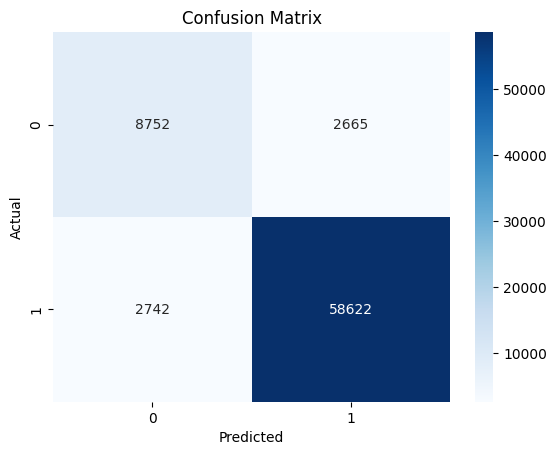

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

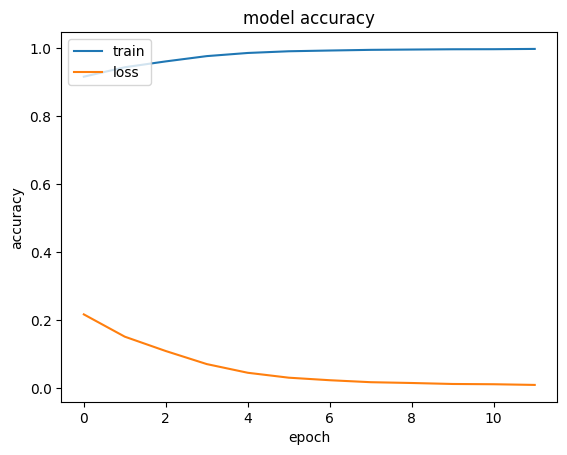

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='upper left')
plt.show()